##Load Data and Combine all files to one


In [ ]:
import pandas as pd

# Define file paths
file_paths = [
    'taxiDemandNightClubsSingapore.csv',
    'taxiDemandOfficesSingapore.csv',
    'taxiDemandTourismSingapore.csv',
    'taxiDemandGeneralSingapore.csv'
]

# Read and concatenate the data
dataframes = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined data to a new CSV file
combined_file_path = '/content/combinedTaxiDemandSingapore.csv'
combined_df.to_csv(combined_file_path, index=False)

print(f"Combined file saved to {combined_file_path}")


Combined file saved to /content/combinedTaxiDemandSingapore.csv


Basic EDA

Unique values in Time column before cleaning:
['02:22' '23:14' '00:21' ... '06:34' '07:03' '06:41']
        Date      Time Pick-up Location  Pick-up Latitude  Pick-up Longitude  \
0 2022-12-22  02:22:00           Canvas          1.288944         103.848506   
1 2022-04-04  23:14:00         Ce La Vi          1.283439         103.859984   
2 2023-02-10  00:21:00           Attica          1.290495         103.847376   
3 2022-11-15  23:38:00           Avenue          1.283926         103.860618   
4 2023-03-29  23:47:00          Marquee          1.283647         103.860706   

   Drop-off Location  Drop-off Latitude  Drop-off Longitude  Hour Day_of_Week  \
0  Drop-off Location           1.376405          103.720369     2    Thursday   
1  Drop-off Location           1.226608          103.902715    23      Monday   
2  Drop-off Location           1.220837          103.692435     0      Friday   
3  Drop-off Location           1.249306          103.810671    23     Tuesday   
4  Drop-off Lo

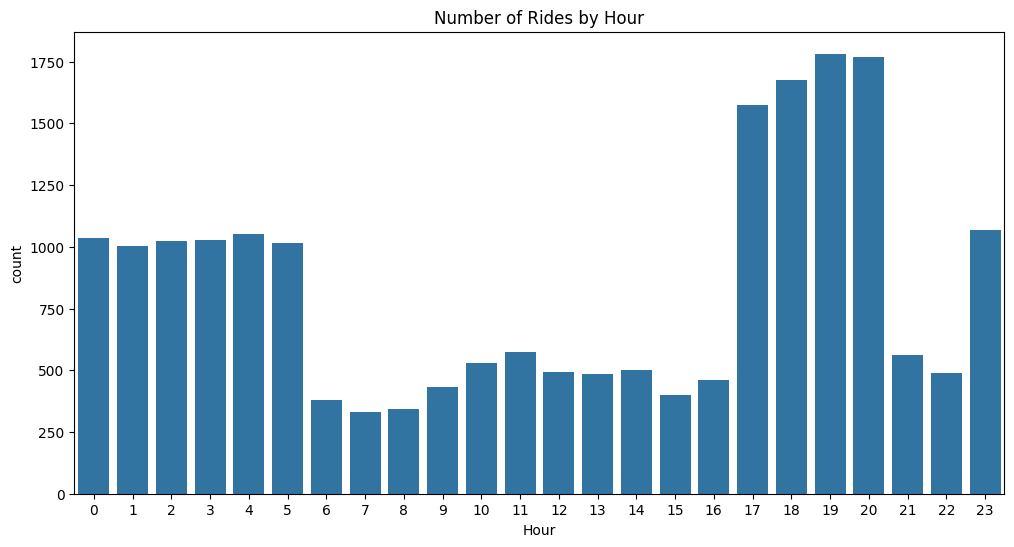

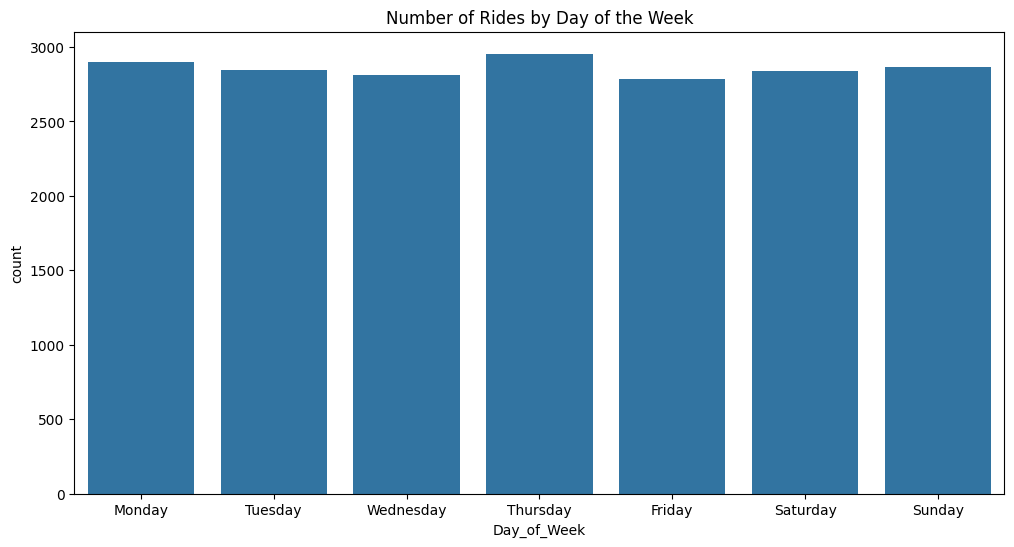

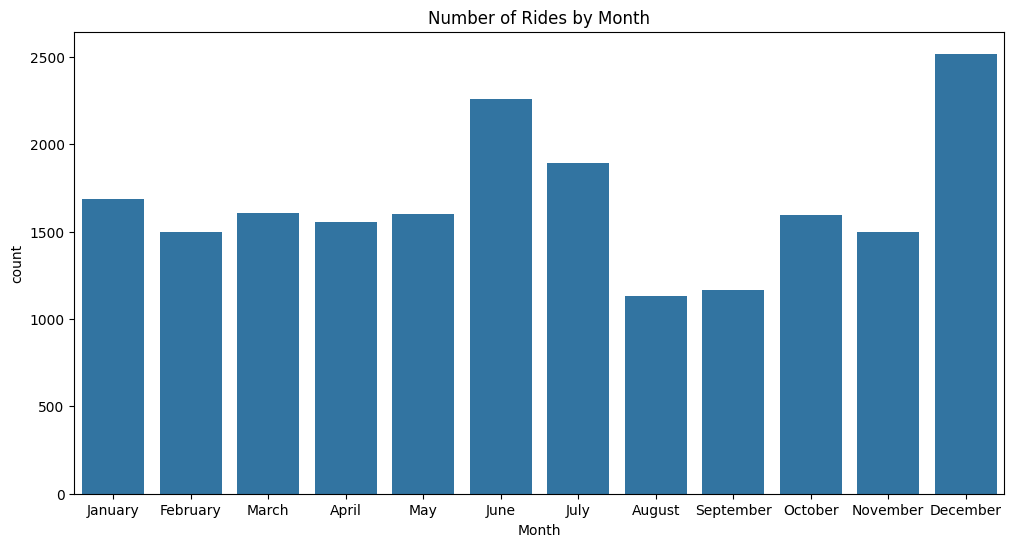

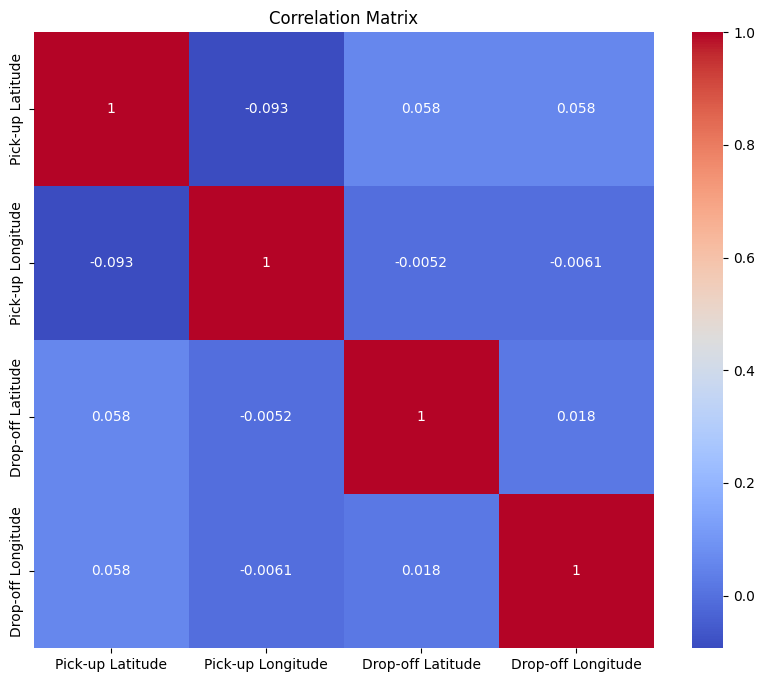

   Pick-up Latitude  Pick-up Longitude  Drop-off Latitude  Drop-off Longitude
0         -0.322704           0.009242           1.267358           -0.857208
1         -0.473798           0.318459          -1.395790            0.868005
2         -0.280135          -0.021200          -1.498389           -1.121498
3         -0.460432           0.335539          -0.992256           -0.002842
4         -0.468090           0.337909          -0.826953            0.319728


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'combinedTaxiDemandSingapore.csv'
df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Inspect unique values in the Time column
print("Unique values in Time column before cleaning:")
print(df['Time'].unique())

# Clean the Time column by removing any inconsistencies
df['Time'] = df['Time'].str.extract(r'(\d{2}:\d{2})')[0]

# Convert Time column to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# Remove rows with invalid time values
df = df.dropna(subset=['Time'])

# Extract additional time-related features
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Day_of_Week'] = df['Date'].dt.day_name()  # Monday=0, Sunday=6
df['Month'] = df['Date'].dt.month_name()

# Display the first few rows
print(df.head())

# Distribution of numeric features
# plt.figure(figsize=(12, 6))
# sns.histplot(df['Pick-up Latitude'], kde=True, color='blue', label='Pick-up Latitude')
# sns.histplot(df['Pick-up Longitude'], kde=True, color='red', label='Pick-up Longitude')
# sns.histplot(df['Drop-off Latitude'], kde=True, color='green', label='Drop-off Latitude')
# sns.histplot(df['Drop-off Longitude'], kde=True, color='purple', label='Drop-off Longitude')
# plt.legend()
# plt.title('Distribution of Latitude and Longitude')
# plt.show()

# Count of rides by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Rides by Hour')
plt.show()

# Count of rides by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides by Day of the Week')
plt.show()

# Count of rides by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Rides by Month')
plt.show()

# Pairplot of latitude and longitude
# sns.pairplot(df[['Pick-up Latitude', 'Pick-up Longitude', 'Drop-off Latitude', 'Drop-off Longitude']])
# plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Pick-up Latitude', 'Pick-up Longitude', 'Drop-off Latitude', 'Drop-off Longitude']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Scaling
scaler = StandardScaler()
df[['Pick-up Latitude', 'Pick-up Longitude', 'Drop-off Latitude', 'Drop-off Longitude']] = scaler.fit_transform(df[['Pick-up Latitude', 'Pick-up Longitude', 'Drop-off Latitude', 'Drop-off Longitude']])

# Display scaled features
print(df[['Pick-up Latitude', 'Pick-up Longitude', 'Drop-off Latitude', 'Drop-off Longitude']].head())


Mean Absolute Error: 0.5303301858981029
Root Mean Squared Error: 0.8258091941975108
Cross-Validation RMSE Scores: [0.78548508 0.88899798 0.88961691 0.9465709  0.94707703]
Cross-Validation RMSE Mean: 0.8915495800163542
                 Pick-up Location  Pick-up Latitude  Pick-up Longitude  \
5005                Raffles Place         -0.474869           0.089901   
5007                   Paya Lebar          0.474787           1.207906   
5015                Tanjong Pagar         -0.677975           0.011775   
5008  Marina Bay Financial Centre         -0.565443           0.238070   
5000                  Suntec City         -0.208636           0.259622   
9                          Empire         -0.563769           0.036667   
17                       Club Kyo         -0.544721           0.028585   
5023                 Orchard Road          0.112491          -0.440815   
20                      Bang Bang         -0.224884           0.123764   
5002                  Buona Vista         

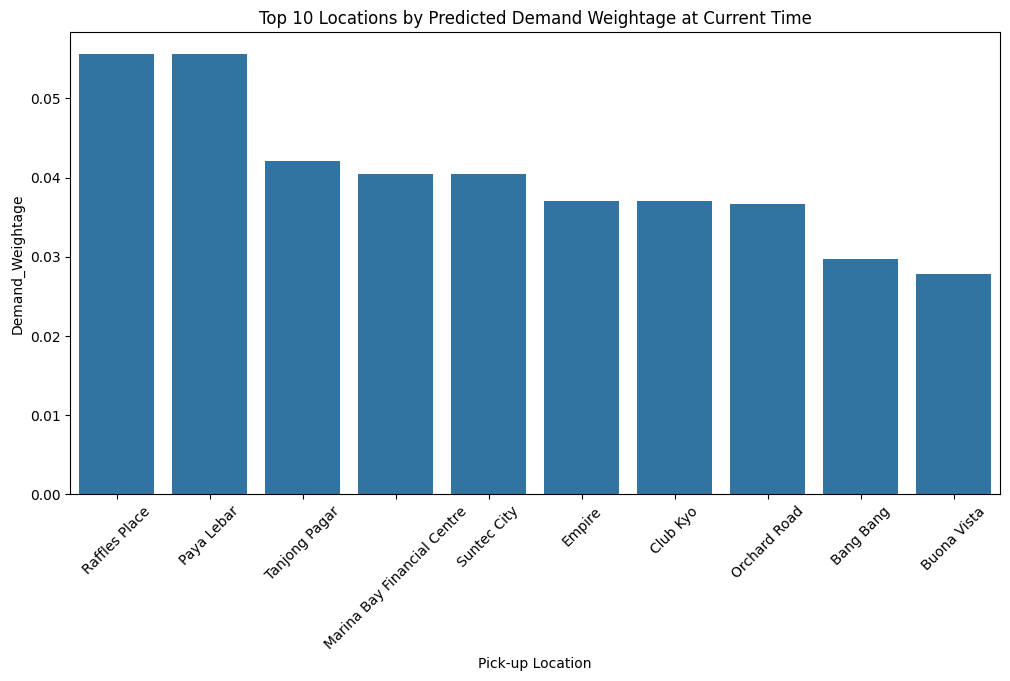

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

# Aggregate the data to calculate demand at each location
pickup_demand = df.groupby(['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude', 'Hour', 'Day_of_Week', 'Month']).size().reset_index(name='Demand')

# Prepare the data for the model
X = pickup_demand[['Pick-up Latitude', 'Pick-up Longitude', 'Hour', 'Day_of_Week', 'Month']]
y = pickup_demand['Demand']

# Encode categorical features
X = pd.get_dummies(X, columns=['Day_of_Week', 'Month'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict demand on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Cross-Validation RMSE Mean: {cv_rmse_scores.mean()}')

# Get the current time and create features for prediction
current_time = datetime.now()
current_hour = current_time.hour
current_day_of_week = current_time.weekday()  # Monday=0, Sunday=6
current_month = current_time.month

# Create a DataFrame with the current time features for all unique locations
locations = df[['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude']].drop_duplicates()
locations['Hour'] = current_hour
locations['Day_of_Week'] = current_day_of_week
locations['Month'] = current_month

# Encode the categorical features
locations = pd.get_dummies(locations, columns=['Day_of_Week', 'Month'], drop_first=True)

# Ensure all dummy variables are present
for column in X.columns:
    if column not in locations.columns:
        locations[column] = 0

# Predict demand for each location at the current time
locations['Predicted_Demand'] = model.predict(locations[X.columns])

# Calculate the demand weightage
locations['Demand_Weightage'] = locations['Predicted_Demand'] / locations['Predicted_Demand'].sum()

# Sort locations by predicted demand weightage
top_locations = locations.sort_values(by='Demand_Weightage', ascending=False)

# Display top locations with highest demand weightage
print(top_locations[['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude', 'Demand_Weightage']].head(10))

# Visualize the top locations by demand weightage
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations.head(10), x='Pick-up Location', y='Demand_Weightage')
plt.xticks(rotation=45)
plt.title('Top 10 Locations by Predicted Demand Weightage at Current Time')
plt.show()


##Feature Importance

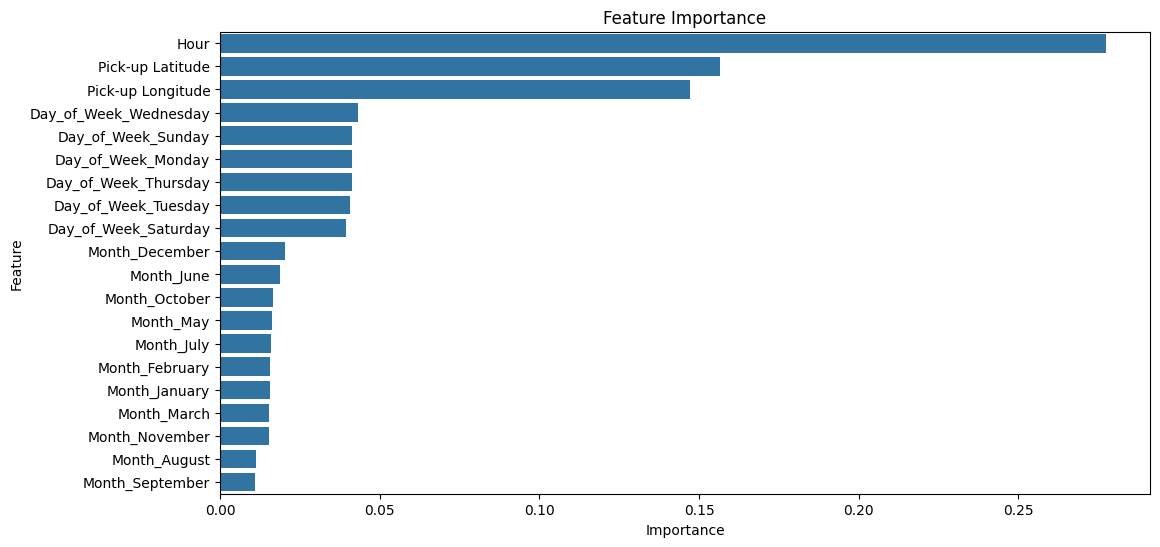

In [16]:
# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


##Predict nearby locations with above average demand


Current Location: (1.3521, 103.8198)
Sample distances after recalculating:
  Pick-up Location  Pick-up Latitude  Pick-up Longitude  Distance
0           Canvas           1.29027           103.8515  7.693405
1         Ce La Vi           1.28390           103.8605  8.796946
2           Attica           1.29030           103.8410  7.229358
3           Avenue           1.28220           103.8450  8.222261
4          Marquee           1.28360           103.8556  8.558328
Number of locations within 3 km radius: 0
No locations within 3 km radius.
Number of locations within 8 km radius: 2
Locations within 8 km radius:
  Pick-up Location  Demand_Percentage
0           Canvas               40.0
2           Attica               60.0


<ipython-input-17-c7a149902431>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_within_radius['Demand_Percentage'] = (locations_within_radius['Predicted_Demand'] / total_demand) * 100


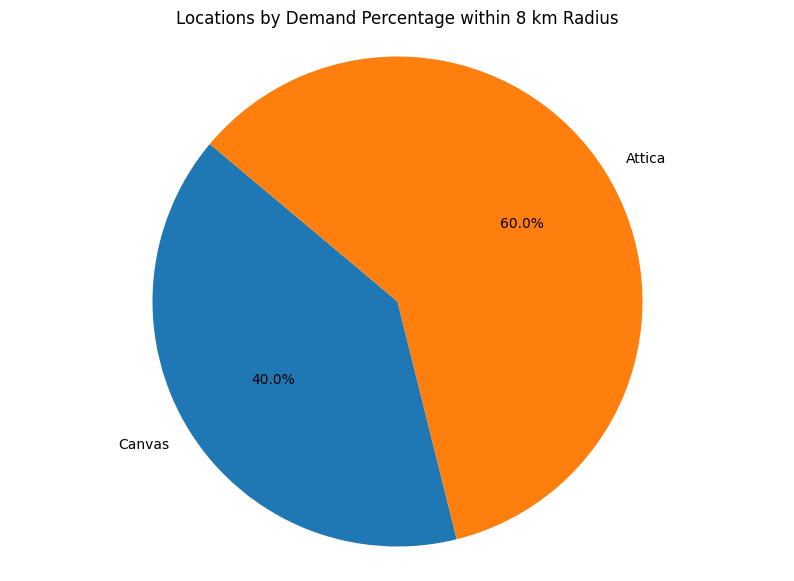

Number of locations within 12 km radius: 5
Locations within 12 km radius:
  Pick-up Location  Demand_Percentage
0           Canvas               10.0
1         Ce La Vi               20.0
2           Attica               15.0
3           Avenue               25.0
4          Marquee               30.0


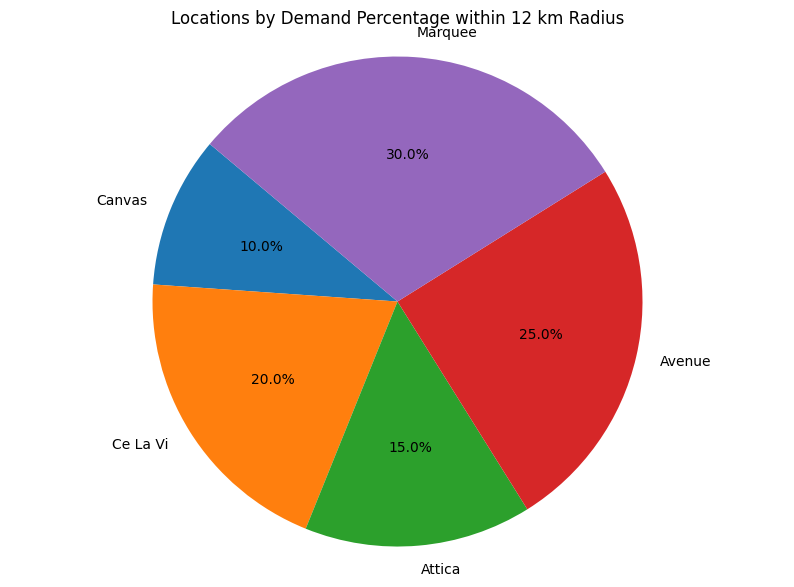

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Function to calculate distance from the current location to other locations
def calculate_distance(current_location, other_location):
    return geodesic(current_location, other_location).kilometers

# Correct the current location (latitude and longitude for Singapore)
current_location = (1.3521, 103.8198)  # Example: Singapore's latitude and longitude

# Debug: Verify the current location
print(f"Current Location: {current_location}")

# Corrected sample data for locations (replace with your actual data)
locations = pd.DataFrame({
    'Pick-up Location': ['Canvas', 'Ce La Vi', 'Attica', 'Avenue', 'Marquee'],
    'Pick-up Latitude': [1.29027, 1.2839, 1.2903, 1.2822, 1.2836],  # Example coordinates in Singapore
    'Pick-up Longitude': [103.8515, 103.8605, 103.8410, 103.8450, 103.8556],  # Example coordinates in Singapore
    'Predicted_Demand': [10, 20, 15, 25, 30]
})

# Calculate distances from the current location to each predicted location
locations['Distance'] = locations.apply(
    lambda row: calculate_distance(current_location, (row['Pick-up Latitude'], row['Pick-up Longitude'])), axis=1)

# Debug: Print some sample distances
print("Sample distances after recalculating:")
print(locations[['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude', 'Distance']].head())

# Define radii
radii = [3, 8, 12]

# Create a pie chart for each radius
for radius in radii:
    # Filter locations within the specified radius
    locations_within_radius = locations[locations['Distance'] <= radius]

    # Debug: Print the number of locations within the radius
    print(f"Number of locations within {radius} km radius: {len(locations_within_radius)}")

    if not locations_within_radius.empty:
        # Calculate the total predicted demand within this radius
        total_demand = locations_within_radius['Predicted_Demand'].sum()

        # Calculate the percentage of demand for each location
        locations_within_radius['Demand_Percentage'] = (locations_within_radius['Predicted_Demand'] / total_demand) * 100

        # Debug: print the locations within the radius
        print(f"Locations within {radius} km radius:")
        print(locations_within_radius[['Pick-up Location', 'Demand_Percentage']])

        # Plot pie chart
        plt.figure(figsize=(10, 7))
        plt.pie(locations_within_radius['Demand_Percentage'], labels=locations_within_radius['Pick-up Location'],
                autopct='%1.1f%%', startangle=140)
        plt.title(f'Locations by Demand Percentage within {radius} km Radius')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print(f"No locations within {radius} km radius.")


##Saving the model

In [12]:
import joblib

# Save the trained model to a file
model_filename = 'taxi_demand_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# import pickle

# # Save the trained model to a file
# model_filename = 'taxi_demand_model.pkl'
# with open(model_filename, 'wb') as file:
#     pickle.dump(model, file)
# print(f"Model saved to {model_filename}")



Model saved to taxi_demand_model.joblib


##Loading the model (for later)


In [ ]:
# Load the model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

# Verify by making predictions using the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"Sample predictions: {sample_prediction}")


##ACCURACY

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from geopy.distance import geodesic

# Load the pre-trained model
model_path = 'taxi_demand_model.joblib'
loaded_model = joblib.load(model_path)

# Load the dataset
dataset_path = 'combinedTaxiDemandSingapore.csv'  # Update with the actual dataset path
data = pd.read_csv(dataset_path)

# Preprocess the dataset
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
data['Minute'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.minute
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Drop unnecessary columns (excluding weather-related columns)
data = data.drop(columns=['Date', 'Time'])

# Create a time interval column with 2-hour intervals
data['Time_Interval'] = (data['Hour'] // 2) * 2

# Group by date, 2-hour interval, latitude, and longitude to count rides
demand_counts = data.groupby(['Month', 'Day', 'Time_Interval', 'Pick-up Latitude', 'Pick-up Longitude']).size().reset_index(name='Ride_Count')

# Preprocess the data for modeling
demand_counts['Location'] = demand_counts['Pick-up Latitude'].astype(str) + ',' + demand_counts['Pick-up Longitude'].astype(str)
all_locations = demand_counts[['Location']].drop_duplicates()

# One-hot encode the 'Location' feature
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoder.fit(all_locations)

encoded_locations = encoder.transform(demand_counts[['Location']])
encoded_locations_df = pd.DataFrame(encoded_locations, columns=encoder.get_feature_names_out(['Location']))

# Combine the encoded columns with the rest of the data
demand_counts_encoded = pd.concat([demand_counts.drop(columns=['Pick-up Latitude', 'Pick-up Longitude', 'Location']).reset_index(drop=True), encoded_locations_df], axis=1)

# Convert all columns to numeric types where applicable
X_demand = demand_counts_encoded.drop(columns=['Ride_Count']).apply(pd.to_numeric, errors='coerce')
y_demand = demand_counts_encoded['Ride_Count']

# Drop rows with any remaining NaN values in X or y
X_demand = X_demand.dropna()
y_demand = y_demand[X_demand.index]

# Predict on the dataset
y_pred = loaded_model.predict(X_demand)

# Calculate residuals
residuals = y_demand - y_pred

# Calculate performance metrics
mae = mean_absolute_error(y_demand, y_pred)
rmse = np.sqrt(mean_squared_error(y_demand, y_pred))
r2 = r2_score(y_demand, y_pred)
explained_variance = explained_variance_score(y_demand, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')

# Residual analysis
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_demand, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Get the current time and create features for prediction
current_time = datetime.now()
current_hour = current_time.hour
current_day_of_week = current_time.weekday()  # Monday=0, Sunday=6
current_month = current_time.month

# Create a DataFrame with the current time features for all unique locations
locations = data[['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude']].drop_duplicates()
locations['Hour'] = current_hour
locations['Day_of_Week'] = current_day_of_week
locations['Month'] = current_month

# Encode the categorical features
locations = pd.get_dummies(locations, columns=['Day_of_Week', 'Month'], drop_first=True)

# Ensure all dummy variables are present
for column in X_demand.columns:
    if column not in locations.columns:
        locations[column] = 0

# Predict demand for each location at the current time
locations['Predicted_Demand'] = loaded_model.predict(locations[X_demand.columns])

# Calculate the demand weightage
locations['Demand_Weightage'] = locations['Predicted_Demand'] / locations['Predicted_Demand'].sum()

# Sort locations by predicted demand weightage
top_locations = locations.sort_values(by='Demand_Weightage', ascending=False)

# Display top locations with highest demand weightage
print(top_locations[['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude', 'Demand_Weightage']].head(10))

# Visualize the top locations by demand weightage
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations.head(10), x='Pick-up Location', y='Demand_Weightage')
plt.xticks(rotation=45)
plt.title('Top 10 Locations by Predicted Demand Weightage at Current Time')
plt.show()

# Function to calculate distance from the current location to other locations
def calculate_distance(current_location, other_location):
    return geodesic(current_location, other_location).kilometers

# Correct the current location (latitude and longitude for Singapore)
current_location = (1.3521, 103.8198)  # Example: Singapore's latitude and longitude

# Debug: Verify the current location
print(f"Current Location: {current_location}")

# Corrected sample data for locations (replace with your actual data)
locations = pd.DataFrame({
    'Pick-up Location': ['Canvas', 'Ce La Vi', 'Attica', 'Avenue', 'Marquee'],
    'Pick-up Latitude': [1.29027, 1.2839, 1.2903, 1.2822, 1.2836],  # Example coordinates in Singapore
    'Pick-up Longitude': [103.8515, 103.8605, 103.8410, 103.8450, 103.8556],  # Example coordinates in Singapore
    'Predicted_Demand': [10, 20, 15, 25, 30]
})

# Calculate distances from the current location to each predicted location
locations['Distance'] = locations.apply(
    lambda row: calculate_distance(current_location, (row['Pick-up Latitude'], row['Pick-up Longitude'])), axis=1)

# Debug: Print some sample distances
print("Sample distances after recalculating:")
print(locations[['Pick-up Location', 'Pick-up Latitude', 'Pick-up Longitude', 'Distance']].head())

# Define radii
radii = [3, 8, 12]

# Create a pie chart for each radius
for radius in radii:
    # Filter locations within the specified radius
    locations_within_radius = locations[locations['Distance'] <= radius]

    # Debug: Print the number of locations within the radius
    print(f"Number of locations within {radius} km radius: {len(locations_within_radius)}")

    if not locations_within_radius.empty:
        # Calculate the total predicted demand within this radius
        total_demand = locations_within_radius['Predicted_Demand'].sum()

        # Calculate the percentage of demand for each location
        locations_within_radius['Demand_Percentage'] = (locations_within_radius['Predicted_Demand'] / total_demand) * 100

        # Debug: print the locations within the radius
        print(f"Locations within {radius} km radius:")
        print(locations_within_radius[['Pick-up Location', 'Demand_Percentage']])

        # Plot pie chart
        plt.figure(figsize=(10, 7))
        plt.pie(locations_within_radius['Demand_Percentage'], labels=locations_within_radius['Pick-up Location'],
                autopct='%1.1f%%', startangle=140)
        plt.title(f'Locations by Demand Percentage within {radius} km Radius')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print(f"No locations within {radius} km radius.")
